In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
*이름 유행 분석
-모음, 자음, 길이, 전체 다양성, 철자 변화, 첫글자와 마지막글자
-유명인, 인구통계학적 변화 등 외부 데이터를 통한 유행 분석
-각 연도별 가장 인기 있는 이름
-가장 많이 증가하거나 감소한 이름
-이름의 길이 변화?
-a~z 문자 빈도수 비교(남/여)
-a~z 문자 상관관계
-모음/자음 비율

In [2]:
pieces=[]
years=range(1880,2011)
for y in years:
    frame=pd.read_csv("babynames/yob%d.txt" % y, names=['name','sex','births'])
    # 데이터 분석을 위해 연도 열 추가
    frame['year']=y
    pieces.append(frame)

In [3]:
# 하나의 리스트로 만든 frame을 concat 해준다
names=pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [4]:
# 알파벳 모음을 포함하는 이름
# names.name[names.name.str.contains('a|e|i|o|u|A|E|I|O|U')] # 1685868 rows × 4 columns

In [5]:
# 연도별로 사용된 이름의 개수

In [6]:
year_various_name=names.groupby('year')['name'].nunique()

In [7]:
year_various_name

year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2006    31585
2007    32354
2008    32455
2009    32153
2010    31432
Name: name, Length: 131, dtype: int64

<AxesSubplot:title={'center':'Counts of Name'}, xlabel='year'>

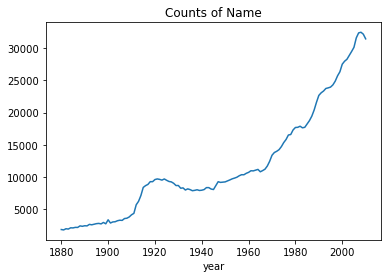

In [8]:
year_various_name.plot(title='Counts of Name')
# 시간이 흐를수록 점점 더 다양한 이름을 사용하는 경향을 보인다.

In [9]:
# 남/여 이름의 다양성

In [10]:
girls_boys=names.pivot_table('births',index='year', columns='sex', aggfunc='nunique')
girls_boys

sex,F,M
year,,
1880,212,203
1881,217,187
1882,226,207
1883,226,198
1884,238,211
...,...,...
2006,953,873
2007,976,890
2008,972,912


<AxesSubplot:title={'center':'Counts of Girls and Boys Name'}, xlabel='year'>

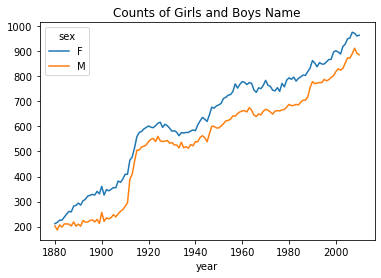

In [11]:
girls_boys.plot(title="Counts of Girls and Boys Name")
# 여자아이와 남자아이 모두 시간이 흐름에 따라 이름의 다양성이 늘었다.

In [12]:
# 마지막 글자의 변화

In [13]:
last_letters=names['name'].apply(lambda x: x[-1])
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [14]:
# 성별에 따른 이름의 마지막 글자로 가장 많이 쓰인 알파벳
last=names.pivot_table('births',index=last_letters, columns='sex',aggfunc=sum)
last.idxmax()  
# F : a
# M : n

sex
F    a
M    n
dtype: object

In [15]:
n_table=names.pivot_table('births',index=last_letters, columns=['sex','year'],aggfunc=sum)
n_table

sex         F                                                                 \
year     1880     1881     1882     1883     1884     1885     1886     1887   
name                                                                           
a     31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0  48942.0   
b         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c         NaN      NaN      5.0      5.0      NaN      NaN      NaN      NaN   
d       609.0    607.0    734.0    810.0    916.0    862.0   1007.0   1027.0   
e     33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0  54353.0   
f         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g         7.0      5.0     12.0      8.0     24.0     11.0     18.0     25.0   
h      4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   7141.0   
i        61.0     78.0     81.0     76.0     84.0     92.0     85.0    105.0   
j         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k        13.0     15.0     11.0     17.0     21.0     18.0     27.0     19.0   
l      2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   6175.0   
m        58.0     57.0     81.0     86.0     79.0     75.0    103.0     90.0   
n      3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   5512.0   
o        30.0     49.0     35.0     47.0     74.0     84.0     93.0     97.0   
p         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r       481.0    417.0    590.0    640.0    718.0    799.0    917.0    910.0   
s      1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   2803.0   
t      2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   3140.0   
u       380.0    427.0    410.0    444.0    490.0    495.0    511.0    476.0   
v         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w         NaN      5.0      NaN      NaN      NaN      NaN      5.0      NaN   
x         NaN      NaN      NaN      7.0      NaN      NaN      NaN      NaN   
y     10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0  14980.0   
z       106.0     95.0    106.0    141.0    148.0    150.0    202.0    188.0   

sex                     ...         M                                          \
year     1888     1889  ...      2001      2002      2003      2004      2005   
name                    ...                                                     
a     59442.0  58631.0  ...   39124.0   38815.0   37825.0   38650.0   36838.0   
b         NaN      NaN  ...   50950.0   49284.0   48065.0   45914.0   43144.0   
c         NaN      NaN  ...   27113.0   27238.0   27697.0   26778.0   26078.0   
d      1298.0   1374.0  ...   60838.0   55829.0   53391.0   51754.0   50670.0   
e     66750.0  66663.0  ...  145395.0  144651.0  144769.0  142098.0  141123.0   
f         NaN      NaN  ...    1758.0    1817.0    1819.0    1904.0    1985.0   
g        44.0     28.0  ...    2151.0    2084.0    2009.0    1837.0    1882.0   
h      8630.0   8826.0  ...   85959.0   88085.0   88226.0   89620.0   92497.0   
i       141.0    134.0  ...   20980.0   23610.0   26011.0   28500.0   31317.0   
j         NaN      NaN  ...    1069.0    1088.0    1203.0    1094.0    1291.0   
k        21.0     22.0  ...   42477.0   42043.0   42296.0   41400.0   42151.0   
l      7900.0   8395.0  ...  153648.0  153493.0  153862.0  152800.0  155312.0   
m       123.0    137.0  ...   41967.0   42663.0   42790.0   43054.0   41600.0   
n      6833.0   7103.0  ...  616099.0  630322.0  663419.0  676011.0  686326.0   
o       134.0    142.0  ...   82146.0   83180.0   85423.0   88822.0   92001.0   
p         NaN      NaN  ...    3419.0    3157.0    2982.0    2841.0    2768.0   
q         NaN      NaN  ...     602.0     618.0     585.0     523.0     446.0   
r      1207.0   1214.0  ...  165377.0  164821.0  169878.0  

In [16]:
# 연도를 원하는 연도만 나오도록
sub_table=n_table.reindex(columns=[1880,1910,1950,2010], level='year')
sub_table

sex         F                                      M                     \
year     1880      1910      1950      2010     1880     1910      1950   
name                                                                      
a     31446.0  108376.0  576481.0  670605.0    776.0    977.0    4037.0   
b         NaN       NaN      17.0     450.0    509.0    411.0    1632.0   
c         NaN       5.0      16.0     946.0    349.0    482.0    6500.0   
d       609.0    6750.0    4413.0    2607.0   9177.0  22111.0  263643.0   
e     33378.0  133569.0  376863.0  313833.0  13493.0  28655.0  168659.0   
f         NaN       NaN       NaN      97.0    108.0    152.0     851.0   
g         7.0      57.0     109.0     657.0    147.0    437.0    7437.0   
h      4863.0   20427.0   77899.0  133424.0   4049.0   8848.0   67926.0   
i        61.0     605.0   18111.0   55820.0    200.0    164.0     622.0   
j         NaN       NaN       NaN     159.0      NaN      NaN       5.0   
k        13.0      48.0     202.0     626.0   4720.0   7104.0   55780.0   
l      2541.0   17121.0   65088.0   46360.0   5090.0  12626.0  172053.0   
m        58.0     476.0    1608.0    4552.0  11260.0  11272.0   68846.0   
n      3008.0   31412.0  251970.0  246631.0  16929.0  27851.0  251831.0   
o        30.0     658.0    7248.0    2187.0    933.0   3314.0   19269.0   
p         NaN       7.0      36.0      35.0    282.0    616.0   11391.0   
q         NaN       NaN       NaN      53.0      NaN      NaN       NaN   
r       481.0    5308.0    8398.0   31707.0   7454.0  12522.0   61049.0   
s      1391.0   15477.0   39035.0   23451.0  18453.0  25404.0  241618.0   
t      2152.0   10877.0   38183.0   13773.0   6949.0  14153.0  122970.0   
u       380.0     271.0     918.0     734.0     25.0     24.0      77.0   
v         NaN       NaN       NaN     205.0     33.0     22.0      29.0   
w         NaN       8.0      42.0    2080.0    853.0   1229.0    7028.0   
x         NaN       6.0      54.0    1279.0    304.0    770.0    3192.0   
y     10469.0   43991.0  245709.0  205501.0   8371.0  15021.0  253223.0   
z       106.0     967.0     601.0    1238.0     29.0     33.0     268.0   

sex             
year      2010  
name            
a      28438.0  
b      38859.0  
c      23125.0  
d      44398.0  
e     129012.0  
f       2255.0  
g       2666.0  
h      98090.0  
i      42956.0  
j       1459.0  
k      35198.0  
l     133583.0  
m      46808.0  
n     688677.0  
o      81025.0  
p       2409.0  
q        342.0  
r     166064.0  
s     123670.0  
t      43398.0  
u       2318.0  
v       2723.0  
w      30656.0  
x      16352.0  
y     110425.0  
z       3476.0

In [17]:
letter_prop=sub_table/sub_table.sum()
letter_prop

sex          F                                       M                      \
year      1880      1910      1950      2010      1880      1910      1950   
name                                                                         
a     0.345587  0.273390  0.336533  0.381240  0.007023  0.005031  0.002255   
b          NaN       NaN  0.000010  0.000256  0.004607  0.002116  0.000912   
c          NaN  0.000013  0.000009  0.000538  0.003159  0.002482  0.003631   
d     0.006693  0.017028  0.002576  0.001482  0.083055  0.113858  0.147292   
e     0.366819  0.336941  0.220002  0.178415  0.122116  0.147556  0.094226   
f          NaN       NaN       NaN  0.000055  0.000977  0.000783  0.000475   
g     0.000077  0.000144  0.000064  0.000374  0.001330  0.002250  0.004155   
h     0.053444  0.051529  0.045475  0.075852  0.036645  0.045562  0.037949   
i     0.000670  0.001526  0.010573  0.031734  0.001810  0.000844  0.000347   
j          NaN       NaN       NaN  0.000090       NaN       NaN  0.000003   
k     0.000143  0.000121  0.000118  0.000356  0.042718  0.036581  0.031163   
l     0.027925  0.043189  0.037996  0.026356  0.046066  0.065016  0.096122   
m     0.000637  0.001201  0.000939  0.002588  0.101907  0.058044  0.038463   
n     0.033057  0.079240  0.147093  0.140210  0.153213  0.143415  0.140693   
o     0.000330  0.001660  0.004231  0.001243  0.008444  0.017065  0.010765   
p          NaN  0.000018  0.000021  0.000020  0.002552  0.003172  0.006364   
q          NaN       NaN       NaN  0.000030       NaN       NaN       NaN   
r     0.005286  0.013390  0.004903  0.018025  0.067461  0.064481  0.034107   
s     0.015287  0.039042  0.022787  0.013332  0.167006  0.130815  0.134987   
t     0.023650  0.027438  0.022290  0.007830  0.062891  0.072879  0.068701   
u     0.004176  0.000684  0.000536  0.000417  0.000226  0.000124  0.000043   
v          NaN       NaN       NaN  0.000117  0.000299  0.000113  0.000016   
w          NaN  0.000020  0.000025  0.001182  0.007720  0.006329  0.003926   
x          NaN  0.000015  0.000032  0.000727  0.002751  0.003965  0.001783   
y     0.115053  0.110972  0.143438  0.116828  0.075760  0.077349  0.141470   
z     0.001165  0.002439  0.000351  0.000704  0.000262  0.000170  0.000150   

sex             
year      2010  
name            
a     0.014980  
b     0.020470  
c     0.012181  
d     0.023387  
e     0.067959  
f     0.001188  
g     0.001404  
h     0.051670  
i     0.022628  
j     0.000769  
k     0.018541  
l     0.070367  
m     0.024657  
n     0.362771  
o     0.042681  
p     0.001269  
q     0.000180  
r     0.087477  
s     0.065145  
t     0.022861  
u     0.001221  
v     0.001434  
w     0.016148  
x     0.008614  
y     0.058168  
z     0.001831

<AxesSubplot:title={'center':'Boys'}, xlabel='name'>

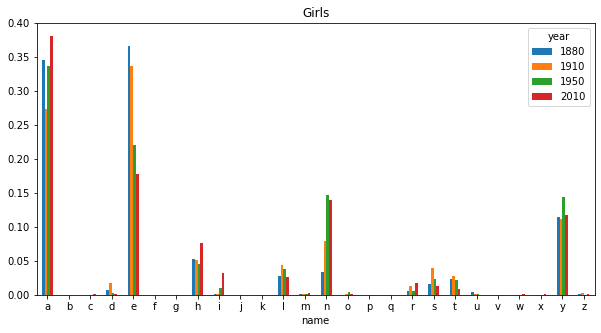

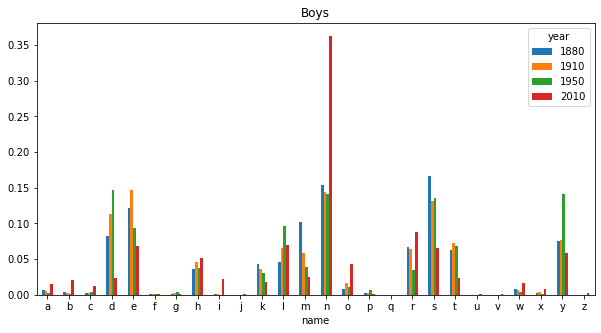

In [18]:
letter_prop['F'].plot(title='Girls',kind='bar',figsize=(10,5), rot=0)  # rot=0: 글자 기울기
letter_prop['M'].plot(title='Boys',kind='bar',figsize=(10,5), rot=0)  # rot=0: 글자 기울기

In [19]:
# 가장 높은 양상을 띄는 남자아이 이름 5개 d,e,n,s,y의 추세

In [20]:
most_alpha=letter_prop.M[letter_prop.M.index.str.contains('d|e|n|s|y')].T
most_alpha

name,d,e,n,s,y
year,,,,,
1880,0.083055,0.122116,0.153213,0.167006,0.075760
1910,0.113858,0.147556,0.143415,0.130815,0.077349
1950,0.147292,0.094226,0.140693,0.134987,0.141470
2010,0.023387,0.067959,0.362771,0.065145,0.058168


<AxesSubplot:xlabel='year'>

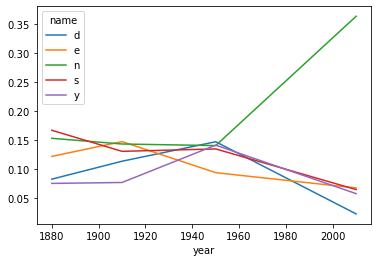

In [21]:
most_alpha.plot()
# 1940년 이후 n이 가장 급격하게 증가했다는 사실을 알 수 있다

In [22]:
# 첫 글자의 변화 추세

In [23]:
first_letters=names['name'].apply(lambda x: x[0])
first_letters

0          M
1          A
2          E
3          E
4          M
          ..
1690779    Z
1690780    Z
1690781    Z
1690782    Z
1690783    Z
Name: name, Length: 1690784, dtype: object

In [24]:
first_table= names.pivot_table('births', index=first_letters, columns=['sex', 'year'], aggfunc=sum)
first_table

sex         F                                                                 \
year     1880     1881     1882     1883     1884     1885     1886     1887   
name                                                                           
A      9334.0   9405.0  11001.0  11632.0  13324.0  13437.0  14416.0  14836.0   
B      3874.0   4013.0   4824.0   5194.0   6005.0   6340.0   6990.0   7110.0   
C      5868.0   5661.0   6454.0   6857.0   7919.0   8164.0   8412.0   8605.0   
D      2218.0   2299.0   2557.0   2709.0   3060.0   3031.0   3231.0   3144.0   
E     11444.0  11742.0  13771.0  14449.0  16465.0  17379.0  18825.0  19140.0   
F      2957.0   2875.0   3512.0   3614.0   4196.0   4499.0   5065.0   5253.0   
G      2463.0   2621.0   3054.0   3210.0   3790.0   4007.0   4533.0   4558.0   
H      2743.0   2630.0   3192.0   3373.0   3973.0   4174.0   4648.0   5002.0   
I      2480.0   2456.0   2788.0   2890.0   3389.0   3450.0   3870.0   3862.0   
J      3801.0   3813.0   4491.0   4612.0   5239.0   5528.0   5828.0   5629.0   
K      1514.0   1473.0   1729.0   1752.0   1971.0   2064.0   2212.0   2310.0   
L      8714.0   8970.0  10417.0  11051.0  12248.0  12687.0  13663.0  13611.0   
M     19779.0  19670.0  23213.0  23631.0  27079.0  27529.0  29540.0  29632.0   
N      3026.0   3291.0   3536.0   3774.0   4231.0   4346.0   4653.0   4695.0   
O       968.0    974.0   1244.0   1391.0   1624.0   1601.0   1939.0   1960.0   
P      1064.0   1144.0   1442.0   1564.0   1889.0   1960.0   2136.0   2286.0   
Q        28.0     22.0     22.0     17.0     32.0     28.0     50.0     33.0   
R      2647.0   2715.0   3198.0   3235.0   3943.0   4230.0   4559.0   4612.0   
S      3958.0   3935.0   4587.0   4483.0   5084.0   5056.0   5682.0   5395.0   
T       503.0    513.0    618.0    685.0    844.0    750.0    960.0    932.0   
U        15.0     20.0     34.0     26.0     37.0     57.0     50.0     66.0   
V       930.0    959.0   1281.0   1292.0   1563.0   1706.0   1970.0   2007.0   
W       467.0    544.0    640.0    640.0    781.0    747.0    904.0    938.0   
X         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
Y         7.0      NaN      NaN      NaN      5.0      7.0     13.0      7.0   
Z       191.0    210.0    246.0    241.0    330.0    279.0    389.0    360.0   

sex                     ...         M                                          \
year     1888     1889  ...      2001      2002      2003      2004      2005   
name                    ...                                                     
A     17729.0  17689.0  ...  189874.0  195896.0  208421.0  214679.0  216042.0   
B      8775.0   8744.0  ...  102260.0  102009.0  103251.0  104295.0  105325.0   
C     10412.0  10257.0  ...  176796.0  171727.0  176042.0  176323.0  175163.0   
D      3852.0   3732.0  ...  154619.0  151285.0  153742.0  149913.0  148518.0   
E     23258.0  23244.0  ...   84224.0   90358.0   94306.0   99243.0   99529.0   
F      6690.0   6607.0  ...   16445.0   15896.0   16565.0   16809.0   17195.0   
G      5676.0   5908.0  ...   54536.0   56917.0   59826.0   57942.0   60645.0   
H      6391.0   6629.0  ...   32295.0   33375.0   33648.0   33844.0   35629.0   
I      4741.0   4782.0  ...   35630.0   36566.0   37990.0   39530.0   40006.0   
J      7150.0   6893.0  ...  337470.0  337175.0  335152.0  330671.0  329632.0   
K      2596.0   2592.0  ...   75640.0   76026.0   77075.0   79041.0   77892.0   
L     16682.0  16427.0  ...   62313.0   65877.0   71223.0   74775.0   81253.0   
M     35768.0  35784.0  ...  137238.0  133808.0  132089.0  131568.0  131868.0   
N      5538.0   5439.0  ...   74284.0   72003.0   70740.0   71608.0   72980.0   
O      2335.0   2438.0  ...   14709.0   16947.0   19314.0   20930.0   22280.0   
P      2797.0   2770.0  ...   31945.0   30202.0   30151.0   30359.0   30814.0   
Q        38.0     46.0  ...    4794.0    4757.0    4907.0    4825.0    4993.0   
R      5936.0   6135.0  ...   87789.0   85872.0   86587.0  

In [25]:
subtable = first_table.reindex(columns=[1880,1910,1950,2010], level='year') # year 컬럼 기준으로 binning
subtable

sex         F                                     M                     \
year     1880     1910      1950      2010     1880     1910      1950   
name                                                                     
A      9334.0  34079.0   60581.0  309608.0   7406.0  12706.0   64834.0   
B      3874.0  17117.0  118942.0   64191.0   2115.0   4325.0   55989.0   
C      5868.0  18287.0  160638.0   96780.0   9949.0  15199.0   92828.0   
D      2218.0  14529.0  139818.0   47211.0   2488.0   5251.0  189534.0   
E     11444.0  45987.0   62897.0  118824.0   6894.0  13306.0   56076.0   
F      2957.0  14626.0   16895.0   13934.0   6529.0   9070.0   36581.0   
G      2463.0  16250.0   49968.0   49385.0   6274.0   8638.0  104971.0   
H      2743.0  19385.0   15758.0   46936.0   7599.0  12811.0   38984.0   
I      2480.0  10419.0   10401.0   47144.0    947.0   1572.0    4214.0   
J      3801.0  15950.0  178444.0  118205.0  22272.0  34856.0  279706.0   
K      1514.0   5078.0   87316.0  144023.0    106.0   1354.0   43617.0   
L      8714.0  33585.0  150150.0  115540.0   4086.0  10976.0   89028.0   
M     19779.0  72790.0  183870.0  173879.0   3166.0   7495.0  123773.0   
N      3026.0   7775.0   44249.0   54043.0    893.0   2251.0   14651.0   
O       968.0   5693.0    3840.0   19629.0   1736.0   2734.0    5477.0   
P      1064.0   7012.0  104268.0   32233.0   2016.0   4703.0   55061.0   
Q        28.0    137.0     304.0    1917.0      8.0     43.0     347.0   
R      2647.0  21721.0   69818.0   56560.0   5211.0  15765.0  255672.0   
S      3958.0  11534.0  169237.0  136880.0   2827.0   5775.0   77246.0   
T       503.0   5587.0   25639.0   40149.0   3564.0   5503.0   89684.0   
U        15.0    159.0     667.0     590.0     54.0     85.0     679.0   
V       930.0  13144.0   37754.0   29088.0    387.0   1801.0   11219.0   
W       467.0   4219.0   15325.0    3826.0  13901.0  17899.0   99210.0   
X         NaN      NaN       9.0    2411.0      NaN      NaN      63.0   
Y         7.0    295.0    5297.0   11561.0     25.0     20.0     123.0   
Z       191.0   1058.0     916.0   24463.0     40.0     60.0     369.0   

sex             
year      2010  
name            
A     198870.0  
B     108460.0  
C     168356.0  
D     123298.0  
E     102513.0  
F      16191.0  
G      61902.0  
H      36378.0  
I      37702.0  
J     299282.0  
K      83903.0  
L     101327.0  
M     123792.0  
N      62540.0  
O      23865.0  
P      29735.0  
Q       4363.0  
R      79825.0  
S      70409.0  
T      75030.0  
U       2946.0  
V      11628.0  
W      36196.0  
X       8774.0  
Y       7627.0  
Z      23470.0

In [26]:
letter_prop2=subtable/subtable.sum()
letter_prop2

sex          F                                       M                      \
year      1880      1910      1950      2010      1880      1910      1950   
name                                                                         
A     0.102579  0.085968  0.035365  0.176013  0.067027  0.065428  0.036221   
B     0.042575  0.043179  0.069435  0.036493  0.019141  0.022271  0.031280   
C     0.064488  0.046131  0.093776  0.055020  0.090042  0.078265  0.051861   
D     0.024376  0.036651  0.081622  0.026840  0.022517  0.027039  0.105889   
E     0.125768  0.116007  0.036717  0.067552  0.062393  0.068518  0.031328   
F     0.032497  0.036896  0.009863  0.007922  0.059090  0.046705  0.020437   
G     0.027068  0.040992  0.029170  0.028075  0.056782  0.044480  0.058645   
H     0.030145  0.048901  0.009199  0.026683  0.068774  0.065969  0.021780   
I     0.027255  0.026283  0.006072  0.026801  0.008571  0.008095  0.002354   
J     0.041772  0.040236  0.104170  0.067200  0.201569  0.179487  0.156266   
K     0.016639  0.012810  0.050973  0.081877  0.000959  0.006972  0.024368   
L     0.095766  0.084722  0.087653  0.065685  0.036980  0.056520  0.049738   
M     0.217368  0.183620  0.107338  0.098850  0.028653  0.038595  0.069149   
N     0.033255  0.019613  0.025831  0.030724  0.008082  0.011591  0.008185   
O     0.010638  0.014361  0.002242  0.011159  0.015711  0.014078  0.003060   
P     0.011693  0.017688  0.060869  0.018325  0.018245  0.024218  0.030761   
Q     0.000308  0.000346  0.000177  0.001090  0.000072  0.000221  0.000194   
R     0.029090  0.054793  0.040758  0.032154  0.047161  0.081180  0.142839   
S     0.043498  0.029096  0.098796  0.077816  0.025585  0.029738  0.043156   
T     0.005528  0.014094  0.014967  0.022825  0.032255  0.028337  0.050105   
U     0.000165  0.000401  0.000389  0.000335  0.000489  0.000438  0.000379   
V     0.010221  0.033157  0.022040  0.016537  0.003502  0.009274  0.006268   
W     0.005132  0.010643  0.008946  0.002175  0.125809  0.092169  0.055427   
X          NaN       NaN  0.000005  0.001371       NaN       NaN  0.000035   
Y     0.000077  0.000744  0.003092  0.006572  0.000226  0.000103  0.000069   
Z     0.002099  0.002669  0.000535  0.013907  0.000362  0.000309  0.000206   

sex             
year      2010  
name            
A     0.104758  
B     0.057133  
C     0.088684  
D     0.064949  
E     0.054000  
F     0.008529  
G     0.032608  
H     0.019163  
I     0.019860  
J     0.157651  
K     0.044197  
L     0.053375  
M     0.065209  
N     0.032944  
O     0.012571  
P     0.015663  
Q     0.002298  
R     0.042049  
S     0.037089  
T     0.039523  
U     0.001552  
V     0.006125  
W     0.019067  
X     0.004622  
Y     0.004018  
Z     0.012363

<AxesSubplot:title={'center':'Boys'}, xlabel='name'>

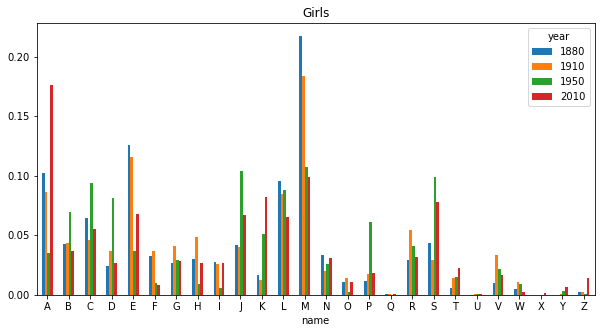

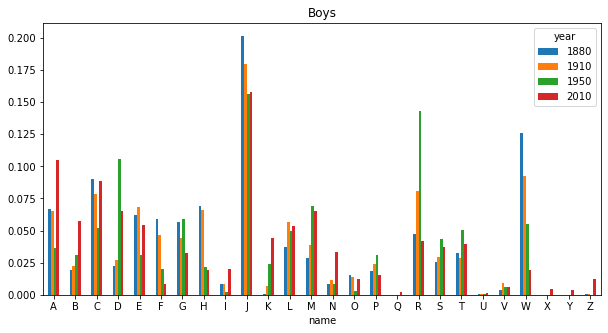

In [27]:
# 연도별 성별 첫 글자
letter_prop2['F'].plot(title='Girls',kind='bar',figsize=(10,5), rot=0)  # rot=0: 글자 기울기
letter_prop2['M'].plot(title='Boys',kind='bar',figsize=(10,5), rot=0)  # rot=0: 글자 기울기

In [28]:
# 여자아이 이름 중 5개의 알파벳의 추세 확인해보기
most_alpha2=letter_prop2.F[letter_prop2.F.index.str.contains('A|E|J|M|S')].T
most_alpha2

name,A,E,J,M,S
year,,,,,
1880,0.102579,0.125768,0.041772,0.217368,0.043498
1910,0.085968,0.116007,0.040236,0.183620,0.029096
1950,0.035365,0.036717,0.104170,0.107338,0.098796
2010,0.176013,0.067552,0.067200,0.098850,0.077816


<AxesSubplot:xlabel='year'>

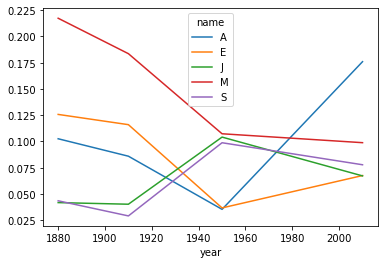

In [29]:
most_alpha2.plot()
# 1880~1980년도까지는 M으로 시작하는 여자아이 이름이 많았다
# 1950년 이후부터 A로 시작하는 여자아이 이름이 강한 추세를 보인다

In [40]:
# 성별, 연도별 사용된 이름의 종류의 개수
year_name=names.groupby(['sex','year','name'])[['births']].sum()
year_name

births
sex year name             
F   1880 Abbie          71
         Abby            6
         Abigail        12
         Ada           652
         Adah           24
...                    ...
M   2010 Zyrion         13
         Zyron           7
         Zyshawn         9
         Zytavious       6
         Zzyzx           5

[1690784 rows x 1 columns]

In [43]:
year_name_pt=year_name.pivot_table('births',index='year',columns=['sex','name'])
year_name_pt

sex          F                                                              \
name Aabriella Aaden Aadhya Aadi Aadison Aaditri Aadya Aadyn Aafreen Aagot   
year                                                                         
1880       NaN   NaN    NaN  NaN     NaN     NaN   NaN   NaN     NaN   NaN   
1881       NaN   NaN    NaN  NaN     NaN     NaN   NaN   NaN     NaN   NaN   
1882       NaN   NaN    NaN  NaN     NaN     NaN   NaN   NaN     NaN   NaN   
1883       NaN   NaN    NaN  NaN     NaN     NaN   NaN   NaN     NaN   NaN   
1884       NaN   NaN    NaN  NaN     NaN     NaN   NaN   NaN     NaN   NaN   
...        ...   ...    ...  ...     ...     ...   ...   ...     ...   ...   
2006       NaN   NaN    NaN  5.0     NaN     NaN  21.0   NaN     NaN   NaN   
2007       NaN   NaN   10.0  NaN     NaN     NaN  16.0   NaN     NaN   NaN   
2008       5.0   NaN    9.0  NaN     NaN     NaN  21.0   9.0     NaN   NaN   
2009       NaN   5.0   18.0  NaN     6.0     NaN  31.0   7.0     NaN   NaN   
2010       NaN   NaN   19.0  NaN     NaN     5.0  33.0   NaN     NaN   NaN   

sex   ...     M                                                                \
name  ... Zyron Zyrus Zysean Zyshaun Zyshawn Zyshon Zyshonne Zytavious Zyvion   
year  ...                                                                       
1880  ...   NaN   NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1881  ...   NaN   NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1882  ...   NaN   NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1883  ...   NaN   NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1884  ...   NaN   NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
...   ...   ...   ...    ...     ...     ...    ...      ...       ...    ...   
2006  ...   6.0   NaN    NaN     5.0     5.0    NaN      NaN       7.0    NaN   
2007  ...  22.0   NaN    NaN     7.0    11.0    NaN      NaN       6.0    NaN   
2008  ...   9.0   9.0    NaN     6.0    14.0    NaN      NaN       NaN    NaN   
2009  ...  14.0   NaN    NaN     NaN     7.0    NaN      NaN       7.0    5.0   
2010  ...   7.0   NaN    NaN     NaN     9.0    NaN      NaN       6.0    NaN   

sex         
name Zzyzx  
year        
1880   NaN  
1881   NaN  
1882   NaN  
1883   NaN  
1884   NaN  
...    ...  
2006   NaN  
2007   NaN  
2008   NaN  
2009   NaN  
2010   5.0  

[131 rows x 98148 columns]

In [ ]:
# 연도별 출생

In [48]:
both=names.groupby('year').sum()
girls=names[names['sex']=='F'].groupby('year').sum()
boys=names[names['sex']=='M'].groupby('year').sum()

In [49]:
girls

,births
year,
1880,90993
1881,91955
1882,107851
1883,112322
1884,129021
...,...
2006,1896468
2007,1916888
2008,1883645


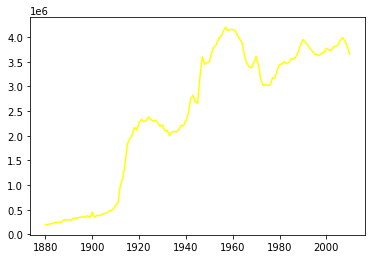

In [56]:
# 남/여 연도별 출생현황
plt.plot(both,label="Both", color='yellow')

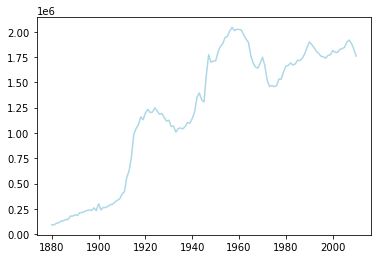

In [57]:
# 여자아이 연도별 출생현황
plt.plot(girls,label="Girls", color='lightblue')

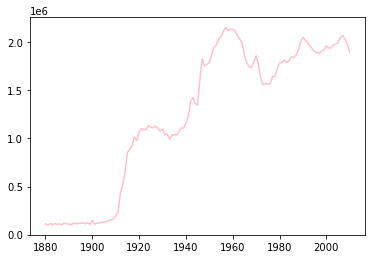

In [58]:
# 남자아이 연도별 출생현황
plt.plot(boys,label="Boys", color='pink')

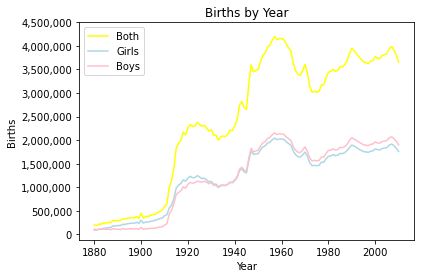

In [66]:
# 남/여 연도별 출생현황
plt.plot(both,label="Both", color='yellow')
# 여자아이 연도별 출생현황
plt.plot(girls,label="Girls", color='lightblue')
# 남자아이 연도별 출생현황
plt.plot(boys,label="Boys", color='pink')
# Births 값을 표시해주기 위해
y_labels = ["{:,}".format(i) for i in range(0, 4500000+1, 500000)]
plt.yticks(np.arange(0, 4500000+1, 500000), y_labels)
plt.legend()
plt.grid(False)
plt.xlabel("Year")
plt.ylabel("Births")
plt.title("Births by Year")
plt.show()

In [30]:
# 각 연도별 가장 인기 있는 이름

In [68]:
# 결측값을 0으로 채우기
pop_names=names.pivot_table(index="name", columns="year", values="births", aggfunc=np.sum).fillna(0)
pop_names

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,,,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,9.0
Aabid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aabriella,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
Aadam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,10.0,9.0,6.0,9.0,8.0,6.0,9.0,7.0
Aadan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,8.0,22.0,23.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyshonne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zytavious,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,6.0,5.0,7.0,6.0,0.0,7.0,6.0
Zyvion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [70]:
# 연도별로 각 이름의 백분율을 계산
percent_names = pop_names / pop_names.sum() * 100
percent_names

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,,,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000125,0.000000,0.000158,0.000246
Aabid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aabriella,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000128,0.000000,0.000000
Aadam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000295,0.000263,0.000236,0.000156,0.000228,0.000201,0.000153,0.000237,0.000191
Aadan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000132,0.000000,0.000000,0.000000,0.000201,0.000562,0.000605,0.000301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyshonne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000321,0.000241,0.000184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zytavious,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000161,0.000000,0.000157,0.000130,0.000177,0.000151,0.000000,0.000184,0.000164
Zyvion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000132,0.000000


In [71]:
# 누적 백분율 합계를 저장할 새 열을 추가
percent_names["total"] = percent_names.sum(axis=1)

In [72]:
percent_names

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,total
name,,,,,,,,,,,,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000125,0.000000,0.000158,0.000246,0.000529
Aabid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000132
Aabriella,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000128,0.000000,0.000000,0.000128
Aadam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000295,0.000263,0.000236,0.000156,0.000228,0.000201,0.000153,0.000237,0.000191,0.003533
Aadan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000132,0.000000,0.000000,0.000000,0.000201,0.000562,0.000605,0.000301,0.001800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyshonne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000241,0.000184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002717
Zytavious,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000161,0.000000,0.000157,0.000130,0.000177,0.000151,0.000000,0.000184,0.000164,0.001124
Zyvion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000132,0.000000,0.000132


In [73]:
# 상위 10개 이름만 슬라이스
sorted_names= percent_names.sort_values(by="total", ascending=False).drop("total", axis=1)[0:10]
sorted_names

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,,,,,,,,,,,,
Mary,3.519848,3.605548,3.691917,3.707698,3.800531,3.805562,3.886450,4.015845,3.941393,4.045557,...,0.153205,0.146010,0.131820,0.126410,0.115945,0.103453,0.092170,0.088816,0.082399,0.077268
John,4.814727,4.564018,4.331988,4.117924,3.871999,3.654020,3.553930,3.300390,3.105300,2.976201,...,0.505539,0.467415,0.453956,0.432553,0.411344,0.384498,0.361930,0.339483,0.317258,0.312600
James,2.952562,2.836489,2.667714,2.419407,2.351868,2.159364,2.108702,1.934962,1.872195,1.746269,...,0.457368,0.454611,0.445475,0.433235,0.420466,0.411964,0.399912,0.386598,0.372849,0.375705
William,4.746235,4.438955,4.211016,3.884234,3.668274,3.353428,3.245693,3.037248,2.920317,2.705574,...,0.537902,0.539389,0.526964,0.532800,0.496537,0.479717,0.473266,0.468979,0.470060,0.461859
Robert,1.204550,1.115188,1.133891,1.080874,1.016980,0.968621,0.963485,0.862184,0.946282,0.874865,...,0.338987,0.322262,0.300065,0.280530,0.264648,0.250462,0.234614,0.224747,0.204893,0.204572
Michael,0.175695,0.154642,0.144896,0.141505,0.153204,0.153617,0.136298,0.139453,0.155599,0.130814,...,0.796035,0.758444,0.715858,0.670169,0.621160,0.574049,0.551061,0.525517,0.496264,0.469460
Charles,2.659738,2.415115,2.308859,2.232731,1.980153,1.919388,1.784015,1.642717,1.542299,1.462837,...,0.195117,0.193127,0.202721,0.201753,0.206767,0.203030,0.186948,0.185855,0.190844,0.192350
David,0.431295,0.389200,0.378265,0.342008,0.312569,0.297686,0.263979,0.276077,0.267456,0.261975,...,0.517735,0.500281,0.490407,0.482886,0.471675,0.446271,0.438822,0.415429,0.404788,0.384564
Joseph,1.311257,1.279689,1.207919,1.167529,1.115967,1.060376,1.019101,0.997999,1.005383,0.946847,...,0.588480,0.586800,0.562599,0.529523,0.500707,0.466795,0.434331,0.421685,0.390397,0.373846


In [74]:
# 인덱스 행을 연도로, 컬럼을 이름으로 바꿔주기
trans_names = sorted_names.transpose()
trans_names

name,Mary,John,James,William,Robert,Michael,Charles,David,Joseph,George
year,,,,,,,,,,
1880,3.519848,4.814727,2.952562,4.746235,1.204550,0.175695,2.659738,0.431295,1.311257,2.557001
1881,3.605548,4.564018,2.836489,4.438955,1.115188,0.154642,2.415115,0.389200,1.279689,2.435873
1882,3.691917,4.331988,2.667714,4.211016,1.133891,0.144896,2.308859,0.378265,1.207919,2.358512
1883,3.707698,4.117924,2.419407,3.884234,1.080874,0.141505,2.232731,0.342008,1.167529,2.193092
1884,3.800531,3.871999,2.351868,3.668274,1.016980,0.153204,1.980153,0.312569,1.115967,2.054086
...,...,...,...,...,...,...,...,...,...,...
2006,0.103453,0.384498,0.411964,0.479717,0.250462,0.574049,0.203030,0.446271,0.466795,0.068564
2007,0.092170,0.361930,0.399912,0.473266,0.234614,0.551061,0.186948,0.438822,0.434331,0.069340
2008,0.088816,0.339483,0.386598,0.468979,0.224747,0.525517,0.185855,0.415429,0.421685,0.064965


In [79]:
trans_names.columns.tolist()

['Mary',
 'John',
 'James',
 'William',
 'Robert',
 'Michael',
 'Charles',
 'David',
 'Joseph',
 'George']

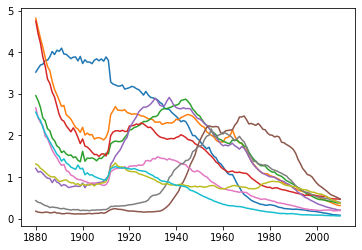

In [80]:
for name in trans_names.columns.tolist():
    plt.plot(trans_names.index, trans_names[name], label=name)

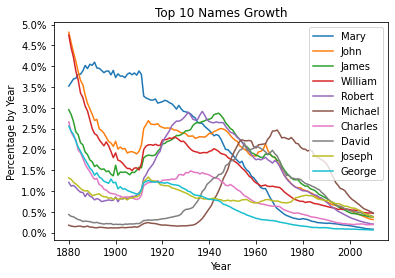

In [82]:
# trans_names의 컬럼(이름)을 리스트로 가져와서 y라벨에서 사용
for name in trans_names.columns.tolist():
    plt.plot(trans_names.index, trans_names[name], label=name)
y_labels = ["{}%".format(i) for i in np.arange(0, 5.5, 0.5)]
plt.yticks(np.arange(0, 5.5, 0.5), y_labels)
plt.legend()
plt.grid(False)
plt.xlabel("Year")
plt.ylabel("Percentage by Year")
plt.title("Top 10 Names Growth")
plt.show()
# 남/여 연도별 인기있는 이름의 현황
# 10개의 이름 모두 1980년 이후 점점 감소하는 형태를 보인다

In [31]:
# 지난 10년간 인기 있던 상위 10명의 남/여 이름

In [84]:
filtered_names= names[names["year"] >= 2001]
filtered_names

,name,sex,births,year
1361930,Emily,F,25048,2001
1361931,Madison,F,22149,2001
1361932,Hannah,F,20700,2001
1361933,Ashley,F,16522,2001
1361934,Alexis,F,16391,2001
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [85]:
# 행 인덱스 : 이름, 컬럼: 연도, 결측값은 0으로 채운다
pivoted_names = filtered_names.pivot_table(index="name", columns="year", values="births", aggfunc=np.sum).fillna(0)
pivoted_names

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,9.0
Aabid,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aabriella,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
Aadam,0.0,11.0,10.0,9.0,6.0,9.0,8.0,6.0,9.0,7.0
Aadan,0.0,0.0,5.0,0.0,0.0,0.0,8.0,22.0,23.0,11.0
...,...,...,...,...,...,...,...,...,...,...
Zyshonne,12.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zytavious,0.0,6.0,0.0,6.0,5.0,7.0,6.0,0.0,7.0,6.0
Zyvion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [86]:
# 연도별로 각 이름의 백분율 계산
percent_names = pivoted_names / pivoted_names.sum() * 100
percent_names

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,
Aaban,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000125,0.000000,0.000158,0.000246
Aabid,0.000000,0.000000,0.000132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aabriella,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000128,0.000000,0.000000
Aadam,0.000000,0.000295,0.000263,0.000236,0.000156,0.000228,0.000201,0.000153,0.000237,0.000191
Aadan,0.000000,0.000000,0.000132,0.000000,0.000000,0.000000,0.000201,0.000562,0.000605,0.000301
...,...,...,...,...,...,...,...,...,...,...
Zyshonne,0.000321,0.000241,0.000184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zytavious,0.000000,0.000161,0.000000,0.000157,0.000130,0.000177,0.000151,0.000000,0.000184,0.000164
Zyvion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000132,0.000000


In [87]:
# total열에 누적 백분율 합계 저장
percent_names["total"] = percent_names.sum(axis=1)

In [88]:
percent_names

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,total
name,,,,,,,,,,,
Aaban,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000125,0.000000,0.000158,0.000246,0.000529
Aabid,0.000000,0.000000,0.000132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000132
Aabriella,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000128,0.000000,0.000000,0.000128
Aadam,0.000000,0.000295,0.000263,0.000236,0.000156,0.000228,0.000201,0.000153,0.000237,0.000191,0.001960
Aadan,0.000000,0.000000,0.000132,0.000000,0.000000,0.000000,0.000201,0.000562,0.000605,0.000301,0.001800
...,...,...,...,...,...,...,...,...,...,...,...
Zyshonne,0.000321,0.000241,0.000184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000746
Zytavious,0.000000,0.000161,0.000000,0.000157,0.000130,0.000177,0.000151,0.000000,0.000184,0.000164,0.001124
Zyvion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000132,0.000000,0.000132


In [89]:
# 상위 10개만 슬라이스
sorted_names = percent_names.sort_values("total", ascending=False).drop("total", axis=1)[0:10]
sorted_names

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,
Jacob,0.870524,0.819168,0.780859,0.734685,0.673256,0.629234,0.608359,0.575492,0.554143,0.598842
Michael,0.796035,0.758444,0.715858,0.670169,0.621160,0.574049,0.551061,0.525517,0.496264,0.469460
Joshua,0.696644,0.696730,0.661444,0.636744,0.605941,0.565003,0.517745,0.489204,0.462325,0.416991
Emily,0.670807,0.655827,0.677378,0.658713,0.623896,0.542124,0.485408,0.444923,0.402867,0.388036
Matthew,0.717667,0.674390,0.632525,0.601956,0.559604,0.514531,0.469528,0.448141,0.418626,0.381939
Ethan,0.480825,0.592934,0.563099,0.585152,0.555852,0.519700,0.527153,0.516068,0.521099,0.489010
Daniel,0.562188,0.571318,0.554961,0.551308,0.527315,0.508374,0.507359,0.484811,0.460273,0.429486
Andrew,0.600249,0.590041,0.583959,0.571075,0.540163,0.499354,0.462479,0.427507,0.389345,0.385712
Christopher,0.619105,0.581095,0.546980,0.516547,0.500081,0.498492,0.501338,0.457487,0.428492,0.386778


In [90]:
transposed_names = sorted_names.transpose()
transposed_names

name,Jacob,Michael,Joshua,Emily,Matthew,Ethan,Daniel,Andrew,Christopher,William
year,,,,,,,,,,
2001,0.870524,0.796035,0.696644,0.670807,0.717667,0.480825,0.562188,0.600249,0.619105,0.537902
2002,0.819168,0.758444,0.696730,0.655827,0.674390,0.592934,0.571318,0.590041,0.581095,0.539389
2003,0.780859,0.715858,0.661444,0.677378,0.632525,0.563099,0.554961,0.583959,0.546980,0.526964
2004,0.734685,0.670169,0.636744,0.658713,0.601956,0.585152,0.551308,0.571075,0.516547,0.532800
2005,0.673256,0.621160,0.605941,0.623896,0.559604,0.555852,0.527315,0.540163,0.500081,0.496537
2006,0.629234,0.574049,0.565003,0.542124,0.514531,0.519700,0.508374,0.499354,0.498492,0.479717
2007,0.608359,0.551061,0.517745,0.485408,0.469528,0.527153,0.507359,0.462479,0.501338,0.473266
2008,0.575492,0.525517,0.489204,0.444923,0.448141,0.516068,0.484811,0.427507,0.457487,0.468979
2009,0.554143,0.496264,0.462325,0.402867,0.418626,0.521099,0.460273,0.389345,0.428492,0.470060


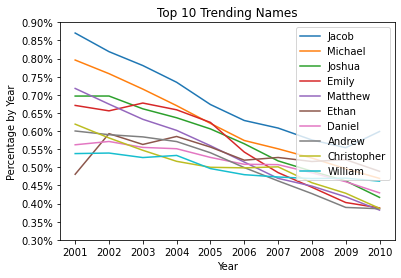

In [99]:
# 컬럼(열 이름)을 레이블과 y축으로 사용 - 이름을 개별적으로 표시
for name in transposed_names.columns.tolist():
    plt.plot(transposed_names.index, transposed_names[name], label=name)
# 퍼센트로 표시해주고 단위는 0.05%로 설정
y_labels = ["{:.2f}%".format(i) for i in np.arange(0.3, 0.9, 0.05)]
plt.yticks(np.arange(0.3, 0.9, 0.05), y_labels)
xticks_labels = ["{}".format(i) for i in range(2001, 2010+1, 1)]
plt.xticks(np.arange(2001, 2010+1, 1), xticks_labels)
# 제목 넣어줌
plt.legend()
plt.grid(False)
plt.xlabel("Year")
plt.ylabel("Percentage by Year")
plt.title("Top 10 Trending Names")
plt.show()
# Jacob을 제외하고는 나머지 이름들은 하락세를 보인다

In [ ]:
# 모음 자음